# Tugas 8 (gaussian)

## Import modul

In [ ]:
# Data Wrangling 
import pandas as pd
import numpy as np
from collections import OrderedDict

# Modelling 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from scipy.io import arff
from io import StringIO

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [ ]:
from scipy.io import arff
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HamedAyani114/dataset/main/csv_result-messidor_features.csv')

In [ ]:
df

,id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Class
0,1,1,1,22,22,22,19,18,14,49.895756,...,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,...,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,...,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,...,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1147,1,1,34,34,34,33,31,24,6.071765,...,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1147,1148,1,1,49,49,49,49,45,37,63.197145,...,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1148,1149,1,0,49,48,48,45,43,33,30.461898,...,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1149,1150,1,1,39,36,29,23,13,7,40.525739,...,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [ ]:
col_names = []
for i in range(21):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')
    if i == 20:
      col_names.append('ket')

In [ ]:
df.columns = [col_names]

In [ ]:
df

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,...,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label,ket
0,1,1,1,22,22,22,19,18,14,49.895756,...,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,...,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,...,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,...,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1147,1,1,34,34,34,33,31,24,6.071765,...,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1147,1148,1,1,49,49,49,49,45,37,63.197145,...,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1148,1149,1,0,49,48,48,45,43,33,30.461898,...,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1149,1150,1,1,39,36,29,23,13,7,40.525739,...,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [ ]:
X = df.drop(columns=['label', 'ket'])
y = df['label'].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(X))

MinMaxScaler()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


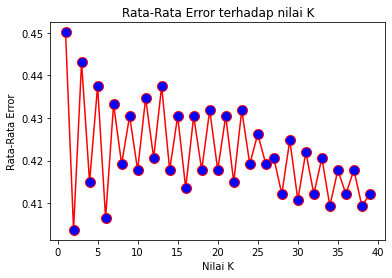

In [ ]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 40), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

NameError: ignored

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit (y)

In [ ]:
y=le.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

training, test = train_test_split(df, train_size = 0.8, test_size = 0.2, shuffle=False)
training_label, test_label = train_test_split(y, train_size = 0.8, test_size = 0.2, shuffle=False)

clf2 = GaussianNB()
clf2.fit(training, training_label)

In [ ]:
from IPython.core.events import post_execute
from sklearn.metrics import accuracy_score

post=clf2.predict_proba(test)

probas=post[:,1]
probas=np.round(probas)
pred=probas
akurasi=accuracy_score(test_label, pred)
akurasi